# Importing libraries

In [4]:
import pandas as pd
import requests
import os
import tweepy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather

### 1- Reading "twitter-archive-enhanced.csv" file

In [2]:
twitter_arch_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### 2- Gathering image prediction  data

#### * Downloading "image_predictions.tsv" file using the "Requests" library

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

In [ ]:
response.content

In [ ]:
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [ ]:
os.listdir()

#### * Reading "image_predictions.tsv" file 

In [3]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### 3- Getting data from twitter using "Tweepy" access library

#### * Qurering tweets' status using "Tweepy" and twitter API

In [ ]:
consumer_key = 'Key'
consumer_secret = 'Secret'
access_token = 'Token'
access_secret = 'Secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit_notify=True, wait_on_rate_limit= True)

In [ ]:
tweet = api.get_status(666020888022790149)

In [ ]:
print(tweet._json)

In [ ]:
twitter_arch_df['tweet_id'].duplicated()

In [ ]:
while True:
    for tweet_id in twitter_arch_df['tweet_id']:
        try:            
            tweet = api.get_status(tweet_id)
            with open('tweet_json.txt', 'a') as file:
                json.dump(tweet._json, file)
                file.write('\n')
                print(tweet_id)
        except tweepy.TweepError as no_tweet:
            print("This id: " + str(tweet_id) + " wasn't found")
            continue
    break

#### * Reading the generated Json file

In [26]:
json_data = []
with open ('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data.append(json.loads(line))

In [27]:
json_data

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 

#### * Extracting required tweet status

In [5]:
req_json_data = []
keys = ['id', 'favorite_count', 'retweet_count', 'retweeted']

In [6]:
for i in range(len(json_data)):
    req_tweet_status = {}
    for key in keys:
        req_tweet_status[key] = json_data[i][key]
    print(req_tweet_status)
        
    req_json_data.append(req_tweet_status)

{'id': 892420643555336193, 'favorite_count': 35324, 'retweet_count': 7456, 'retweeted': False}
{'id': 892177421306343426, 'favorite_count': 30567, 'retweet_count': 5535, 'retweeted': False}
{'id': 891815181378084864, 'favorite_count': 23004, 'retweet_count': 3661, 'retweeted': False}
{'id': 891689557279858688, 'favorite_count': 38613, 'retweet_count': 7627, 'retweeted': False}
{'id': 891327558926688256, 'favorite_count': 36890, 'retweet_count': 8226, 'retweeted': False}
{'id': 891087950875897856, 'favorite_count': 18613, 'retweet_count': 2753, 'retweeted': False}
{'id': 890971913173991426, 'favorite_count': 10808, 'retweet_count': 1781, 'retweeted': False}
{'id': 890729181411237888, 'favorite_count': 59504, 'retweet_count': 16674, 'retweeted': False}
{'id': 890609185150312448, 'favorite_count': 25604, 'retweet_count': 3806, 'retweeted': False}
{'id': 890240255349198849, 'favorite_count': 29200, 'retweet_count': 6468, 'retweeted': False}
{'id': 890006608113172480, 'favorite_count': 2816

In [7]:
req_json_data

[{'id': 892420643555336193,
  'favorite_count': 35324,
  'retweet_count': 7456,
  'retweeted': False},
 {'id': 892177421306343426,
  'favorite_count': 30567,
  'retweet_count': 5535,
  'retweeted': False},
 {'id': 891815181378084864,
  'favorite_count': 23004,
  'retweet_count': 3661,
  'retweeted': False},
 {'id': 891689557279858688,
  'favorite_count': 38613,
  'retweet_count': 7627,
  'retweeted': False},
 {'id': 891327558926688256,
  'favorite_count': 36890,
  'retweet_count': 8226,
  'retweeted': False},
 {'id': 891087950875897856,
  'favorite_count': 18613,
  'retweet_count': 2753,
  'retweeted': False},
 {'id': 890971913173991426,
  'favorite_count': 10808,
  'retweet_count': 1781,
  'retweeted': False},
 {'id': 890729181411237888,
  'favorite_count': 59504,
  'retweet_count': 16674,
  'retweeted': False},
 {'id': 890609185150312448,
  'favorite_count': 25604,
  'retweet_count': 3806,
  'retweeted': False},
 {'id': 890240255349198849,
  'favorite_count': 29200,
  'retweet_count'

In [8]:
tweepy_df = pd.DataFrame(req_json_data)

In [9]:
tweepy_df

id  favorite_count  retweet_count  retweeted
0     892420643555336193           35324           7456      False
1     892177421306343426           30567           5535      False
2     891815181378084864           23004           3661      False
3     891689557279858688           38613           7627      False
4     891327558926688256           36890           8226      False
...                  ...             ...            ...        ...
2326  666049248165822465              95             39      False
2327  666044226329800704             263            124      False
2328  666033412701032449             108             39      False
2329  666029285002620928             118             41      False
2330  666020888022790149            2356            447      False

[2331 rows x 4 columns]

# --------------------------------------------------------------------------------------------------------

# Assess

In [10]:
twitter_arch_df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [11]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_arch_df['retweeted_status_id'].unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [ ]:
twitter_arch_df['retweeted_status_user_id'].unique()

In [ ]:
twitter_arch_df['retweeted_status_timestamp'].unique()

In [ ]:
twitter_arch_df['in_reply_to_status_id'].unique()

In [ ]:
twitter_arch_df['in_reply_to_user_id'].unique()

In [ ]:
twitter_arch_df.columns

In [ ]:
twitter_arch_df['rating_numerator'].nunique() #40 unique values, values are expected to be between 0-20, there must be 
                                              #some extreme values in this column

In [ ]:
for value in twitter_arch_df['rating_numerator'].unique(): #yea, a lot of extreme values, that can actually be some kind of insight.
    if value > 21:
        print(value)

In [ ]:
twitter_arch_df[twitter_arch_df['rating_numerator'] > 20]

In [ ]:
twitter_arch_df['rating_denominator'].nunique() #denominator must be 10, since ratings are our of 10. hmmm, weird!

In [ ]:
for value in twitter_arch_df['rating_denominator'].unique():   #that actually needs to be cleaned
    print(value)

In [13]:
twitter_arch_df['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [14]:
print(re.search("(?P<url>https?://[^\s]+)", twitter_arch_df['text'][35]).group("url")) 

https://t.co/gzLHboL7Sk


In [16]:
#print(re.search("(?P<url>https?://[^\s]+)", twitter_arch_df['text'][30]).group("url")) #an error to 'pass' when cleaning.

In [ ]:
twitter_arch_df.duplicated().sum()

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
tweepy_df

In [ ]:
tweepy_df.info()

In [ ]:
tweepy_df.duplicated().sum()

In [ ]:
tweepy_df.columns

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
image_predictions_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [ ]:
image_predictions_df.info()

In [ ]:
image_predictions_df.duplicated().sum()

In [ ]:
image_predictions_df.columns

In [ ]:
image_predictions_df['p3_dog'][8]

In [ ]:
for i in range(len(image_predictions_df['p1_dog'])):
    if image_predictions_df['p1_dog'][i] == False and image_predictions_df['p2_dog'][i] == False and image_predictions_df['p3_dog'][i] == False:
        print(i)

## Define issues

### Quality 

#### * twitter_arch_df:

**1-** There are retweets (Only tweets are required).
<br>
**2-** After retweet entries are dropped, ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') features' values are all Null.
<br>
**3-** A lot of data is missing in 2 features('in_reply_to_status_id', 'in_reply_to_user_id').
<br>
**4-** Wrong values in "rating_denominator" column(Higher than 10).
<br>
**5-** Short URLs column is missing.They can be found at the end of 'text' column entries.
<br>
**6-** Short URLs at the end of 'text' column entries.
<br>
**7-** 'timestamp' column ending with an extra text " +0000".

#### * image_prediction_df:

**8-** Some entries with all 3 predictions being False.

### Tidiness

**1-** Last 4 columns(doggo - floofer - pupper - puppo) in "twitter_arch_df" representing only 1 feature (dog stage).
<br>
**2-** The 3 data frames better be merged. Given that "tweet id" is a key feature in all of them.

# Clean

### * Define

**1-** There are retweets(Only tweets are required).

### Code

In [ ]:
twitter_arch_df.info()

In [ ]:
arch_retweets_df = twitter_arch_df[twitter_arch_df['retweeted_status_id'].notnull()]
arch_retweets_df

In [ ]:
twitter_arch_df.drop(arch_retweets_df.index, inplace= True)

### Test

In [ ]:
twitter_arch_df.info()

In [ ]:
twitter_arch_df[twitter_arch_df['retweeted_status_id'].notnull()]

### Store

In [ ]:
twitter_arch_df.to_csv('twitter_arch_df_v1.csv', index= False)

### * Define

**2-** After retweet enteries are dropped, ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') features' values are all Null.

### Code

In [25]:
twitter_arch_df = pd.read_csv('twitter_arch_df_v1.csv')

In [26]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [27]:
twitter_arch_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [28]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 238.0+ 

### Store

In [29]:
twitter_arch_df.to_csv('twitter_arch_df_v2.csv', index= False)

### * Define

**3-** A lot of data is missing in 2 features('in_reply_to_status_id', 'in_reply_to_user_id').

### Code

In [30]:
twitter_arch_df = pd.read_csv('twitter_arch_df_v2.csv')

In [31]:
twitter_arch_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

In [32]:
twitter_arch_df

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2170  666049248165822465  2015-11-16 00:24:50 +0000   
2171  666044226329800704  2015-11-16 00:04:52 +0000   
2172  666033412701032449  2015-11-15 23:21:54 +0000   
2173  666029285002620928  2015-11-15 23:05:30 +0000   
2174  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2170  <a href="http://twitter.com/download/iphone" r...   
2171  <a href="http://twitter.com/download/iphone" r...   
2172  <a href="http://twitter.com/download/iphone" r...   
2173  <a href="http://twitter.com/download/iphone" r...   
2174  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2170  Here we have a 1949 1st generation vulpix. Enj...   
2171  This is a purebred Piers Morgan. Loves to Netf...   
2172  Here is a very happy pup. Big fan of well-main...   
2173  This is a western brown Mitsubishi terrier. Up...   
2174  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2170  https://twitter.com/dog_rates/status/666049248...                 5   
2171  https://twitter.com/dog_rates/status/666044226...                 6   
2172  https://twitter.com/dog_rates/status/666033412...                 9   
2173  https://twitter.com/dog_rates/status/666029285...                 7   
2174  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  
0                     10   Phineas  None    None   None  None  
1                     10     Tilly  None    None   None  None  
2                     10    Archie  None    None   None  None  
3                     10     Darla  None    None   None  None  
4                     10  Franklin  None    None   None  None  
...                  ...       ...   ...     ...    ...   ...  
2170                  10      None  None    None   None  None  
2171                  10         a  None    None   None  None  
2172                  10         a  None    None   None  None  
2173                  10         a  None    None   None  None  
2174                  10      None  None    None   None  None  

[2175 rows x 12 columns]

### Test

In [33]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 204.0+ KB


### Store

In [34]:
twitter_arch_df.to_csv('twitter_arch_df_v3.csv', index= False)

### * Define

**4-** Wrong values in "rating_denominator" column(Higher than 10).

### Code

In [35]:
twitter_arch_df = pd.read_csv('twitter_arch_df_v3.csv')

In [36]:
twitter_arch_df['rating_denominator'] = 10

### Test

In [37]:
twitter_arch_df['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [38]:
twitter_arch_df['rating_denominator'].nunique()

1

### Store

In [39]:
twitter_arch_df.to_csv('twitter_arch_df_v4.csv', index= False)

### * Define

**5-** Short URLs column is missing.They can be found at the end of 'text' column entries.

### Code

In [40]:
twitter_arch_df = pd.read_csv('twitter_arch_df_v4.csv')

In [41]:
twitter_arch_df['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [42]:
print(re.search("(?P<url>https?://[^\s]+)", twitter_arch_df['text'][0]).group("url"))

https://t.co/MgUWQ76dJU


In [43]:
twitter_arch_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [44]:
len(twitter_arch_df['text'])

2175

In [45]:
urls_list = []
for i in range(2175):
    try:
        urls_list.append(re.search("(?P<url>https?://[^\s]+)", twitter_arch_df['text'][i]).group("url"))
    except:
        urls_list.append('URL not available')
urls_list

['https://t.co/MgUWQ76dJU',
 'https://t.co/0Xxu71qeIV',
 'https://t.co/wUnZnhtVJB',
 'https://t.co/tD36da7qLQ',
 'https://t.co/AtUZn91f7f',
 'https://t.co/kQ04fDDRmh',
 'https://t.co/Zr4hWfAs1H',
 'https://t.co/v0nONBcwxq',
 'https://t.co/9TwLuAGH0b',
 'https://t.co/t1bfwz5S2A',
 'https://t.co/dVPW0B0Mme',
 'https://t.co/u1XPQMl29g',
 'https://t.co/BxvuXk0UCm',
 'https://t.co/f8dEDcrKSR',
 'https://t.co/y70o6h3isq',
 'https://t.co/WpHvrQedPb',
 'https://t.co/chxruIOUJN',
 'https://t.co/HTQ77yNQ5K',
 'https://t.co/YnYAFCTTiK',
 'https://t.co/DK7iDPfuRX',
 'https://t.co/PhrUk20Q64',
 'https://t.co/20VrLAA8ba',
 'https://t.co/cLyzpcUcMX',
 'https://t.co/WZqNqygEyV',
 'https://t.co/4Ad1jzJSdp',
 'https://t.co/I6oNy0CgiT',
 'https://t.co/bVi0Yr4Cff',
 'https://t.co/BCoWue0abA',
 'https://t.co/RGE08MIJox',
 'URL not available',
 'https://t.co/xZDA9Qsq1O',
 'https://t.co/BuveP0uMF1',
 'https://t.co/tp1kQ8i9JF',
 'https://t.co/gzLHboL7Sk',
 'https://t.co/44ItaMubBf',
 'https://t.co/MYJvdlNRVa'

In [46]:
len(urls_list)

2175

In [48]:
twitter_arch_df['urls'] = urls_list

### Test

In [50]:
twitter_arch_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'urls'],
      dtype='object')

In [49]:
twitter_arch_df

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2170  666049248165822465  2015-11-16 00:24:50 +0000   
2171  666044226329800704  2015-11-16 00:04:52 +0000   
2172  666033412701032449  2015-11-15 23:21:54 +0000   
2173  666029285002620928  2015-11-15 23:05:30 +0000   
2174  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2170  <a href="http://twitter.com/download/iphone" r...   
2171  <a href="http://twitter.com/download/iphone" r...   
2172  <a href="http://twitter.com/download/iphone" r...   
2173  <a href="http://twitter.com/download/iphone" r...   
2174  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2170  Here we have a 1949 1st generation vulpix. Enj...   
2171  This is a purebred Piers Morgan. Loves to Netf...   
2172  Here is a very happy pup. Big fan of well-main...   
2173  This is a western brown Mitsubishi terrier. Up...   
2174  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2170  https://twitter.com/dog_rates/status/666049248...                 5   
2171  https://twitter.com/dog_rates/status/666044226...                 6   
2172  https://twitter.com/dog_rates/status/666033412...                 9   
2173  https://twitter.com/dog_rates/status/666029285...                 7   
2174  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  \
0                     10   Phineas  None    None   None  None   
1                     10     Tilly  None    None   None  None   
2                     10    Archie  None    None   None  None   
3                     10     Darla  None    None   None  None   
4                     10  Franklin  None    None   None  None   
...                  ...       ...   ...     ...    ...   ...   
2170                  10      None  None    None   None  None   
2171                  10         a  None    None   None  None   
2172                  10         a  None    None   None  None   
2173                  10         a  None    None   None  None   
2174                  10      None  None    None   None  None   

                         urls  
0     https://t.co/MgUWQ76dJU  
1     https://t.co/0Xxu71qeIV  
2     https://t.co/wUnZnhtVJB  
3     https://t.co/tD36da7qLQ  
4     https://t.co/AtUZn91f7f  
...                       ...  
2170  h

### Store

In [51]:
twitter_arch_df.to_csv('twitter_arch_df_v5.csv', index=False)

### * Define

**6-** Short URLs at the end of 'text' column entries.

### Code

In [52]:
twitter_arch_df = pd.read_csv('twitter_arch_df_v5.csv')

In [53]:
len(twitter_arch_df['text'])

2175

In [54]:
for i in range(2175):
    twitter_arch_df['text'][i] = re.sub(r"http\S+", "", twitter_arch_df['text'][i])

<ipython-input-54-58acf5322781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_arch_df['text'][i] = re.sub(r"http\S+", "", twitter_arch_df['text'][i])


### Test

In [55]:
twitter_arch_df['text'][22]

'This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her '

### Store

In [57]:
twitter_arch_df.to_csv('twitter_arch_df_v6.csv', index=False)

### * Define

**7-** 'timestamp' column ending with an extra text " +0000".

### Code

In [157]:
twitter_arch_df = pd.read_csv('twitter_arch_df_v6.csv')

In [158]:
twitter_arch_df['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2170    2015-11-16 00:24:50 +0000
2171    2015-11-16 00:04:52 +0000
2172    2015-11-15 23:21:54 +0000
2173    2015-11-15 23:05:30 +0000
2174    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2175, dtype: object

In [159]:
twitter_arch_df['timestamp'][0]

'2017-08-01 16:23:56 +0000'

In [160]:
len(twitter_arch_df['timestamp'])

2175

In [161]:
for i in range(2175):
    twitter_arch_df['timestamp'][i] = twitter_arch_df['timestamp'][i][:-6]


<ipython-input-161-1899d533adeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_arch_df['timestamp'][i] = twitter_arch_df['timestamp'][i][:-6]


### Test

In [162]:
twitter_arch_df['timestamp'][0:10]

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
5    2017-07-29 00:08:17
6    2017-07-28 16:27:12
7    2017-07-28 00:22:40
8    2017-07-27 16:25:51
9    2017-07-26 15:59:51
Name: timestamp, dtype: object

### Store

In [163]:
twitter_arch_df.to_csv('twitter_arch_df_v7.csv', index= False)

### * Define

#### * Tidiness issue in "image_arch_df"

**1-** Last 4 columns(doggo - floofer - pupper - puppo) in "twitter_arch_df" representing only 1 feature (dog stage).

### Code

In [164]:
twitter_arch_df = pd.read_csv('twitter_arch_df_v7.csv')

In [165]:
twitter_arch_df

tweet_id            timestamp  \
0     892420643555336193  2017-08-01 16:23:56   
1     892177421306343426  2017-08-01 00:17:27   
2     891815181378084864  2017-07-31 00:18:03   
3     891689557279858688  2017-07-30 15:58:51   
4     891327558926688256  2017-07-29 16:00:24   
...                  ...                  ...   
2170  666049248165822465  2015-11-16 00:24:50   
2171  666044226329800704  2015-11-16 00:04:52   
2172  666033412701032449  2015-11-15 23:21:54   
2173  666029285002620928  2015-11-15 23:05:30   
2174  666020888022790149  2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2170  <a href="http://twitter.com/download/iphone" r...   
2171  <a href="http://twitter.com/download/iphone" r...   
2172  <a href="http://twitter.com/download/iphone" r...   
2173  <a href="http://twitter.com/download/iphone" r...   
2174  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2170  Here we have a 1949 1st generation vulpix. Enj...   
2171  This is a purebred Piers Morgan. Loves to Netf...   
2172  Here is a very happy pup. Big fan of well-main...   
2173  This is a western brown Mitsubishi terrier. Up...   
2174  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2170  https://twitter.com/dog_rates/status/666049248...                 5   
2171  https://twitter.com/dog_rates/status/666044226...                 6   
2172  https://twitter.com/dog_rates/status/666033412...                 9   
2173  https://twitter.com/dog_rates/status/666029285...                 7   
2174  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  \
0                     10   Phineas  None    None   None  None   
1                     10     Tilly  None    None   None  None   
2                     10    Archie  None    None   None  None   
3                     10     Darla  None    None   None  None   
4                     10  Franklin  None    None   None  None   
...                  ...       ...   ...     ...    ...   ...   
2170                  10      None  None    None   None  None   
2171                  10         a  None    None   None  None   
2172                  10         a  None    None   None  None   
2173                  10         a  None    None   None  None   
2174                  10      None  None    None   None  None   

                         urls  
0     https://t.co/MgUWQ76dJU  
1     https://t.co/0Xxu71qeIV  
2     https://t.co/wUnZnhtVJB  
3     https://t.co/tD36da7qLQ  
4     https://t.co/AtUZn91f7f  
...                       ...  
2170  https://t.co/4B7cOc1EDq  
2171  https://t.co/DWnyCjf2mx  
2172  https://t

In [166]:
len(twitter_arch_df['doggo'])

2175

In [167]:
type(twitter_arch_df['doggo'][0])

str

In [168]:
len(twitter_arch_df[twitter_arch_df['doggo'] != 'None']), len(twitter_arch_df[twitter_arch_df['floofer'] != 'None']), len(twitter_arch_df[twitter_arch_df['pupper'] != 'None']), len(twitter_arch_df[twitter_arch_df['puppo'] != 'None'])

(87, 10, 234, 25)

In [169]:
sum([87,10,234,25])
#There's not a stage recognised for every dog.
#Only 356 dogs have their stages recognised

356

In [170]:
dog_stage = []
for i in range(2175):
    if twitter_arch_df['doggo'][i] != 'None':
        dog_stage.append(twitter_arch_df['doggo'][i])
    elif twitter_arch_df['floofer'][i] != 'None':
        dog_stage.append(twitter_arch_df['floofer'][i])
    elif twitter_arch_df['pupper'][i] != 'None':
        dog_stage.append(twitter_arch_df['pupper'][i])
    elif twitter_arch_df['puppo'][i] != 'None':
        dog_stage.append(twitter_arch_df['puppo'][i])
    else:
        dog_stage.append('None')
len(dog_stage)

2175

In [171]:
twitter_arch_df['dog_stage'] = dog_stage

In [172]:
twitter_arch_df[twitter_arch_df['dog_stage'] == 'None']

tweet_id            timestamp  \
0     892420643555336193  2017-08-01 16:23:56   
1     892177421306343426  2017-08-01 00:17:27   
2     891815181378084864  2017-07-31 00:18:03   
3     891689557279858688  2017-07-30 15:58:51   
4     891327558926688256  2017-07-29 16:00:24   
...                  ...                  ...   
2170  666049248165822465  2015-11-16 00:24:50   
2171  666044226329800704  2015-11-16 00:04:52   
2172  666033412701032449  2015-11-15 23:21:54   
2173  666029285002620928  2015-11-15 23:05:30   
2174  666020888022790149  2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2170  <a href="http://twitter.com/download/iphone" r...   
2171  <a href="http://twitter.com/download/iphone" r...   
2172  <a href="http://twitter.com/download/iphone" r...   
2173  <a href="http://twitter.com/download/iphone" r...   
2174  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2170  Here we have a 1949 1st generation vulpix. Enj...   
2171  This is a purebred Piers Morgan. Loves to Netf...   
2172  Here is a very happy pup. Big fan of well-main...   
2173  This is a western brown Mitsubishi terrier. Up...   
2174  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2170  https://twitter.com/dog_rates/status/666049248...                 5   
2171  https://twitter.com/dog_rates/status/666044226...                 6   
2172  https://twitter.com/dog_rates/status/666033412...                 9   
2173  https://twitter.com/dog_rates/status/666029285...                 7   
2174  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  \
0                     10   Phineas  None    None   None  None   
1                     10     Tilly  None    None   None  None   
2                     10    Archie  None    None   None  None   
3                     10     Darla  None    None   None  None   
4                     10  Franklin  None    None   None  None   
...                  ...       ...   ...     ...    ...   ...   
2170                  10      None  None    None   None  None   
2171                  10         a  None    None   None  None   
2172                  10         a  None    None   None  None   
2173                  10         a  None    None   None  None   
2174                  10      None  None    None   None  None   

                         urls dog_stage  
0     https://t.co/MgUWQ76dJU      None  
1     https://t.co/0Xxu71qeIV      None  
2     https://t.co/wUnZnhtVJB      None  
3     https://t.co/tD36da7qLQ      None  
4     https://t.co/AtUZn91f7f      None  
...                       ...       ...  
2170  htt

In [173]:
twitter_arch_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace= True)

### Test

In [174]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   urls                2175 non-null   object
 9   dog_stage           2175 non-null   object
dtypes: int64(3), object(7)
memory usage: 170.0+ KB


### Store

In [175]:
twitter_arch_df.to_csv('twitter_arch_df_v8.csv', index= False)

### * Define

#### * Quality issue in image_predictions_df

**8-** Some entries with all 3 predictions being False.

### Code

In [230]:
image_predictions_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [121]:
df1 = image_predictions_df.copy()

In [231]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [232]:
p1_dog_c = image_predictions_df['p1_dog']
p2_dog_c = image_predictions_df['p2_dog']
p3_dog_c = image_predictions_df['p3_dog']

In [234]:
image_predictions_df['p1_dog']

0        True
1        True
2        True
3        True
4        True
        ...  
2070     True
2071    False
2072     True
2073     True
2074    False
Name: p1_dog, Length: 2075, dtype: bool

In [235]:
p1_dog_c[6] == False

True

In [236]:
for i in range(2075):
    if p1_dog_c[i] == False and p2_dog_c[i] == False and p3_dog_c[i] == False:
        print(i)
        image_predictions_df.drop(index=[i], inplace= True)

6
17
18
21
25
29
45
50
51
53
56
69
73
77
78
93
94
96
98
100
106
107
112
115
117
118
123
130
132
140
142
143
151
152
166
168
170
174
177
182
193
195
199
201
203
205
209
212
215
217
219
226
230
232
233
242
244
245
246
247
253
254
260
272
275
277
288
290
293
296
297
300
301
303
307
309
311
312
317
318
321
323
324
325
337
342
347
353
357
358
361
364
365
366
369
372
376
390
391
402
403
409
414
421
424
429
433
434
442
446
448
453
455
457
470
471
476
484
487
508
512
528
533
535
537
542
553
555
576
580
594
596
606
609
615
617
618
619
623
625
636
640
647
651
653
654
655
660
664
666
687
691
698
701
706
715
718
722
733
734
736
743
753
754
761
763
770
775
785
794
795
797
806
811
827
828
832
840
841
843
857
866
870
889
896
903
911
929
930
935
938
942
948
971
974
986
990
1016
1032
1033
1036
1038
1040
1057
1064
1078
1082
1093
1097
1134
1138
1141
1142
1143
1148
1165
1173
1174
1195
1198
1207
1210
1211
1215
1217
1227
1240
1242
1244
1253
1258
1260
1270
1284
1307
1312
1313
1317
1322
1329
1330
1353
1354
13

In [237]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [238]:
image_predictions_df.reset_index(drop=True, inplace=True)

### Test

In [240]:
p1_dog_c_after = image_predictions_df['p1_dog']
p2_dog_c_after = image_predictions_df['p2_dog']
p3_dog_c_after = image_predictions_df['p3_dog']

In [155]:
for i in range(1751):
    if p1_dog_c_after[i] == False and p2_dog_c_after[i] == False and p3_dog_c_after[i] == False:
        print(i)
else:
    print('all good')

all good


### Store

In [241]:
image_predictions_df.to_csv('image-predictions_v1.tsv',sep='\t', index= False)

### * Define

**2-** The 3 data frames better be merged. Given that "tweet id" is a key feature in all of them.

### Code

In [242]:
twitter_arch_df = pd.read_csv('twitter_arch_df_v8.csv')
image_predictions_df = pd.read_csv('image-predictions_v1.tsv', sep= '\t')

In [186]:
twitter_arch_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'urls', 'dog_stage'],
      dtype='object')

In [197]:
tweepy_df.columns

Index(['tweet_id', 'favorite_count', 'retweet_count', 'retweeted'], dtype='object')

In [246]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [247]:
tweepy_df.rename(columns={'id': 'tweet_id'}, inplace=True)

In [248]:
df1 = twitter_arch_df.copy()

In [249]:
df2 = tweepy_df.copy()

In [250]:
df3 = image_predictions_df.copy()

In [251]:
df1_df2 = pd.merge(df1, df2, how='inner', on=['tweet_id'])

In [252]:
df1_df2_df3 = pd.merge(df1_df2, df3, how= 'inner', on=['tweet_id'])

### Test

In [253]:
df1_df2_df3

tweet_id            timestamp  \
0     892177421306343426  2017-08-01 00:17:27   
1     891815181378084864  2017-07-31 00:18:03   
2     891689557279858688  2017-07-30 15:58:51   
3     891327558926688256  2017-07-29 16:00:24   
4     891087950875897856  2017-07-29 00:08:17   
...                  ...                  ...   
1674  666049248165822465  2015-11-16 00:24:50   
1675  666044226329800704  2015-11-16 00:04:52   
1676  666033412701032449  2015-11-15 23:21:54   
1677  666029285002620928  2015-11-15 23:05:30   
1678  666020888022790149  2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1674  <a href="http://twitter.com/download/iphone" r...   
1675  <a href="http://twitter.com/download/iphone" r...   
1676  <a href="http://twitter.com/download/iphone" r...   
1677  <a href="http://twitter.com/download/iphone" r...   
1678  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Tilly. She's just checking pup on you....   
1     This is Archie. He is a rare Norwegian Pouncin...   
2     This is Darla. She commenced a snooze mid meal...   
3     This is Franklin. He would like you to stop ca...   
4     Here we have a majestic great white breaching ...   
...                                                 ...   
1674  Here we have a 1949 1st generation vulpix. Enj...   
1675  This is a purebred Piers Morgan. Loves to Netf...   
1676  Here is a very happy pup. Big fan of well-main...   
1677  This is a western brown Mitsubishi terrier. Up...   
1678  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892177421...                13   
1     https://twitter.com/dog_rates/status/891815181...                12   
2     https://twitter.com/dog_rates/status/891689557...                13   
3     https://twitter.com/dog_rates/status/891327558...                12   
4     https://twitter.com/dog_rates/status/891087950...                13   
...                                                 ...               ...   
1674  https://twitter.com/dog_rates/status/666049248...                 5   
1675  https://twitter.com/dog_rates/status/666044226...                 6   
1676  https://twitter.com/dog_rates/status/666033412...                 9   
1677  https://twitter.com/dog_rates/status/666029285...                 7   
1678  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name                     urls dog_stage  ...  \
0                     10     Tilly  https://t.co/0Xxu71qeIV      None  ...   
1                     10    Archie  https://t.co/wUnZnhtVJB      None  ...   
2                     10     Darla  https://t.co/tD36da7qLQ      None  ...   
3                     10  Franklin  https://t.co/AtUZn91f7f      None  ...   
4                     10      None  https://t.co/kQ04fDDRmh      None  ...   
...                  ...       ...                      ...       ...  ...   
1674                  10      None  https://t.co/4B7cOc1EDq      None  ...   
1675                  10         a  https://t.co/DWnyCjf2mx      None  ...   
1676                  10         a  https://t.co/y671yMhoiR      None  ...   
1677                  10         a  https://t.co/r7mOb2m0UI      None  ...   
1678                  10      None  https://t.co/BLDqew2Ijj      None  ...   

      img_num                        p1   p1_conf p1_dog                  p2  \
0           1                 Chihuahua  0.323581   True           

In [254]:
df1_df2

tweet_id            timestamp  \
0     892420643555336193  2017-08-01 16:23:56   
1     892177421306343426  2017-08-01 00:17:27   
2     891815181378084864  2017-07-31 00:18:03   
3     891689557279858688  2017-07-30 15:58:51   
4     891327558926688256  2017-07-29 16:00:24   
...                  ...                  ...   
2163  666049248165822465  2015-11-16 00:24:50   
2164  666044226329800704  2015-11-16 00:04:52   
2165  666033412701032449  2015-11-15 23:21:54   
2166  666029285002620928  2015-11-15 23:05:30   
2167  666020888022790149  2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2163  <a href="http://twitter.com/download/iphone" r...   
2164  <a href="http://twitter.com/download/iphone" r...   
2165  <a href="http://twitter.com/download/iphone" r...   
2166  <a href="http://twitter.com/download/iphone" r...   
2167  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2163  Here we have a 1949 1st generation vulpix. Enj...   
2164  This is a purebred Piers Morgan. Loves to Netf...   
2165  Here is a very happy pup. Big fan of well-main...   
2166  This is a western brown Mitsubishi terrier. Up...   
2167  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2163  https://twitter.com/dog_rates/status/666049248...                 5   
2164  https://twitter.com/dog_rates/status/666044226...                 6   
2165  https://twitter.com/dog_rates/status/666033412...                 9   
2166  https://twitter.com/dog_rates/status/666029285...                 7   
2167  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name                     urls dog_stage  \
0                     10   Phineas  https://t.co/MgUWQ76dJU      None   
1                     10     Tilly  https://t.co/0Xxu71qeIV      None   
2                     10    Archie  https://t.co/wUnZnhtVJB      None   
3                     10     Darla  https://t.co/tD36da7qLQ      None   
4                     10  Franklin  https://t.co/AtUZn91f7f      None   
...                  ...       ...                      ...       ...   
2163                  10      None  https://t.co/4B7cOc1EDq      None   
2164                  10         a  https://t.co/DWnyCjf2mx      None   
2165                  10         a  https://t.co/y671yMhoiR      None   
2166                  10         a  https://t.co/r7mOb2m0UI      None   
2167                  10      None  https://t.co/BLDqew2Ijj      None   

      favorite_count  retweet_count  retweeted  
0              35324           7456      False  
1              30567           5535      False  
2              23004           3661      False  
3          

In [255]:
len(df1), len(df2), len(df1_df2)

(2175, 2331, 2168)

In [256]:
len(df1), len(df2), len(df1_df2), len(df1_df2_df3)

(2175, 2331, 2168, 1679)

In [257]:
df1_df2_df3.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'urls', 'dog_stage',
       'favorite_count', 'retweet_count', 'retweeted', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [258]:
df1_df2_df3.head(1)

tweet_id            timestamp  \
0  892177421306343426  2017-08-01 00:17:27   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Tilly. She's just checking pup on you....   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator   name                     urls dog_stage  ...  img_num  \
0                  10  Tilly  https://t.co/0Xxu71qeIV      None  ...        1   

          p1   p1_conf p1_dog        p2   p2_conf  p2_dog        p3   p3_conf  \
0  Chihuahua  0.323581   True  Pekinese  0.090647    True  papillon  0.068957   

   p3_dog  
0    True  

[1 rows x 24 columns]

### Store

In [259]:
df1_df2_df3.to_csv('twitter_archive_master.csv', index=False)

# --------------------------------------------------------------------------------------------------------

# Analyze & Visualize

In [6]:
master_df = pd.read_csv('twitter_archive_master.csv')

In [29]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1679 non-null   int64  
 1   timestamp           1679 non-null   object 
 2   source              1679 non-null   object 
 3   text                1679 non-null   object 
 4   expanded_urls       1679 non-null   object 
 5   rating_numerator    1679 non-null   int64  
 6   rating_denominator  1679 non-null   int64  
 7   name                1679 non-null   object 
 8   urls                1679 non-null   object 
 9   dog_stage           1679 non-null   object 
 10  favorite_count      1679 non-null   int64  
 11  retweet_count       1679 non-null   int64  
 12  retweeted           1679 non-null   bool   
 13  jpg_url             1679 non-null   object 
 14  img_num             1679 non-null   int64  
 15  p1                  1679 non-null   object 
 16  p1_con

In [10]:
counts = master_df.groupby(['rating_numerator', 'dog_stage']).mean()
counts

tweet_id  rating_denominator  favorite_count  \
rating_numerator dog_stage                                                     
0                None       8.351524e+17                10.0    21931.000000   
1                None       6.662874e+17                10.0      131.000000   
2                None       6.731515e+17                10.0     2816.500000   
3                None       7.100669e+17                10.0     2988.600000   
4                None       6.948714e+17                10.0     2690.285714   
5                None       6.987099e+17                10.0     5123.000000   
                 doggo      7.515838e+17                10.0     4292.000000   
6                None       6.946932e+17                10.0     2996.937500   
7                None       6.808178e+17                10.0     3217.448276   
                 pupper     6.821891e+17                10.0     2861.666667   
8                None       6.836922e+17                10.0     1627.813559   
                 doggo      7.437953e+17                10.0     3483.500000   
                 pupper     6.872177e+17                10.0     4494.428571   
9                None       6.875152e+17                10.0     2482.644068   
                 pupper     6.970316e+17                10.0     2516.214286   
                 puppo      7.449956e+17                10.0     2898.000000   
10               None       7.015194e+17                10.0     3652.648387   
                 doggo      7.456322e+17                10.0     5489.400000   
                 floofer    7.338223e+17                10.0     3558.000000   
                 pupper     6.921862e+17                10.0     2840.600000   
                 puppo      7.502206e+17                10.0     5114.000000   
11               None       7.278167e+17                10.0     5956.348123   
                 doggo      7.868277e+17                10.0     8078.866667   
                 floofer    6.853075e+17                10.0     2017.000000   
                 pupper     7.128824e+17                10.0     5278.688889   
                 puppo      7.455286e+17                10.0     6079.500000   
12               None       7.661443e+17                10.0    10419.161017   
                 doggo      8.179829e+17                10.0    17279.058824   
                 floofer    7.748527e+17                10.0     8246.500000   
                 pupper     7.451491e+17                10.0     7964.952381   
                 puppo      8.137670e+17                10.0    11998.833333   
13               None       8.186731e+17                10.0    19975.777174   
                 doggo      8.037355e+17                10.0    30573.333333   
                 floofer    7.990083e+17                10.0    20086.333333   
                 pupper     7.755083e+17                10.0    21502.583333   
                 puppo      8.527670e+17                10.0    33753.250000   
14               None       8.381630e+17                10.0    22555.538462   
                 doggo      8.382615e+17                10.0    30103.200000   
                 pupper     8.414352e+17                10.0    29500.250000   
                 puppo      8.255351e+17                10.0    56149.000000   
24               None       8.109847e+17                10.0     5296.000000   
26               None       6.804947e+17                10.0     1669.000000   
27               pupper     7.780270e+17                10.0     6484.000000   
44               None       6.974630e+17                10.0     3325.000000   
45               None       7.091984e+17                10.0     2370.000000   
50               None       7.164391e+17                10.0     2307.000000   
60               None       7.040548e+17                10.0     2837.000000   
75               None       7.867091e+17                10.0    18126.000000   
80               None       7.10

In [31]:
master_df['dog_stage'].value_counts()

None       1420
pupper      168
doggo        63
puppo        21
floofer       7
Name: dog_stage, dtype: int64

### Note 1:
* Most of dogs posted were in "pupper" stage.
It would imply that people tend to post more pictures of their dogs in thas stage.
But unforunately, most of tweets' data avialable in twitter archive didn't include the dog stage.
so we can't be confident enough about this insight.
* Maybe we can try to collect the missing dog stage data for more accurate insight here.

In [320]:
master_df.corr()


tweet_id  rating_numerator  rating_denominator  \
tweet_id            1.000000          0.093284                 NaN   
rating_numerator    0.093284          1.000000                 NaN   
rating_denominator       NaN               NaN                 NaN   
favorite_count      0.598850          0.060830                 NaN   
retweet_count       0.372220          0.047509                 NaN   
retweeted                NaN               NaN                 NaN   
img_num             0.200667          0.035758                 NaN   
p1_conf             0.112037          0.021357                 NaN   
p1_dog              0.053371          0.029845                 NaN   
p2_conf            -0.003113         -0.035413                 NaN   
p2_dog              0.056689         -0.007884                 NaN   
p3_conf            -0.055627         -0.001443                 NaN   
p3_dog              0.021549          0.017166                 NaN   

                    favorite_count  retweet_count  retweeted   img_num  \
tweet_id                  0.598850       0.372220        NaN  0.200667   
rating_numerator          0.060830       0.047509        NaN  0.035758   
rating_denominator             NaN            NaN        NaN       NaN   
favorite_count            1.000000       0.930558        NaN  0.117590   
retweet_count             0.930558       1.000000        NaN  0.090595   
retweeted                      NaN            NaN        NaN       NaN   
img_num                   0.117590       0.090595        NaN  1.000000   
p1_conf                   0.074066       0.051166        NaN  0.215764   
p1_dog                    0.000789      -0.021183        NaN -0.008803   
p2_conf                  -0.015821      -0.014223        NaN -0.173624   
p2_dog                    0.012501      -0.006882        NaN  0.020471   
p3_conf                  -0.049423      -0.039753        NaN -0.146828   
p3_dog                   -0.009952      -0.014206        NaN  0.038024   

                     p1_conf    p1_dog   p2_conf    p2_dog   p3_conf    p3_dog  
tweet_id            0.112037  0.053371 -0.003113  0.056689 -0.055627  0.021549  
rating_numerator    0.021357  0.029845 -0.035413 -0.007884 -0.001443  0.017166  
rating_denominator       NaN       NaN       NaN       NaN       NaN       NaN  
favorite_count      0.074066  0.000789 -0.015821  0.012501 -0.049423 -0.009952  
retweet_count       0.051166 -0.021183 -0.014223 -0.006882 -0.039753 -0.014206  
retweeted                NaN       NaN       NaN       NaN       NaN       NaN  
img_num             0.215764 -0.008803 -0.173624  0.020471 -0.146828  0.038024  
p1_conf             1.000000  0.091198 -0.539432  0.116339 -0.731317  0.079994  
p1_dog              0.091198  1.000000  0.099813  0.217192  0.014836  0.114043  
p2_conf            -0.539432  0.099813  1.000000  0.079562  0.479927  0.030000  
p2_dog              0.116339  0.217192  0.079562  1.000000 -0.005653  0.084128  
p3_conf            -0.731317  0.014836  0.479927 -0.005653  1.000000 -0.002843  
p3_dog              0.079994  0.114043  0.030000  0.084128 -0.002843  1.000000

### Note 2:
* correlation between favorite_count and retweet_count is highly positive. 
(You don't say! I know it's expected, but let's visualise it.)

(0.0, 20000.0)

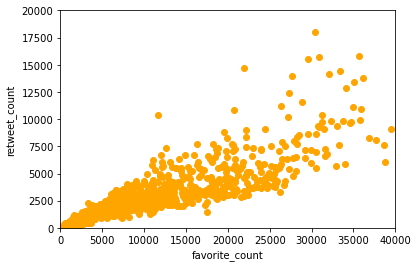

In [37]:
plt.scatter(master_df['favorite_count'], master_df['retweet_count'], color ='orange')

plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.xlim(0, 40000)
plt.ylim(0, 20000)

{'whiskers': [<matplotlib.lines.Line2D at 0x196eb2fbcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x196eb2fb370>,
 'boxes': [<matplotlib.lines.Line2D at 0x196eb2f8cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x196eb2feac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196eb2fe7f0>],
 'means': []}

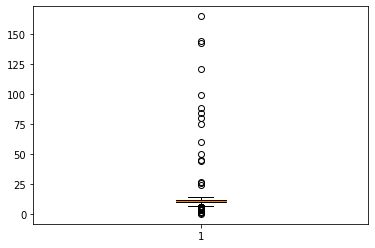

In [323]:
plt.boxplot(master_df['rating_numerator'])

### Note 3:

- A lot of outliers in the 'rating numerator' feature.
<br>
Maybe the twitter account "WeRateDogs" should notify its users to stick to some rating limits.
So that that ratings are more useful.
<br>
<br>
- Now, we have two choices:
<br>
1- Cleaning these outliers, and rate the dogs according to some new shorter range.
<br>
or
<br>
2- Ignore the fact that they are outliers and actually use them to rate the dogs anyway.

(6.0, 15.0)

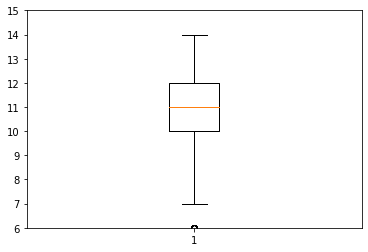

In [327]:
plt.boxplot(master_df['rating_numerator'])
plt.ylim(6,15)

In [336]:
master_df['name'].unique()

array(['Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola', 'Kevin',
       'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley',
       'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Neptune',
       'Belle', 'Quinn', 'Zooey', 'Dave', 'Hobbes', 'Burt', 'Lorenzo',
       'Carl', 'Milky', 'Trooper', 'quite', 'Sophie', 'Wyatt', 'Rosie

In [330]:
len(master_df['name'])

1679

<BarContainer object of 2 artists>

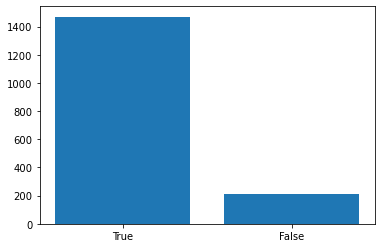

In [350]:
plt.bar(['True', 'False'], master_df['p1_dog'].value_counts())

<BarContainer object of 2 artists>

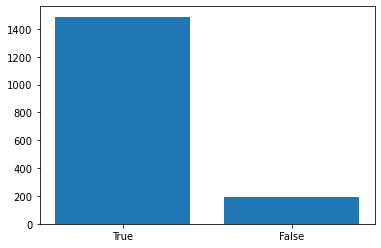

In [351]:
plt.bar(['True', 'False'], master_df['p2_dog'].value_counts())

<BarContainer object of 2 artists>

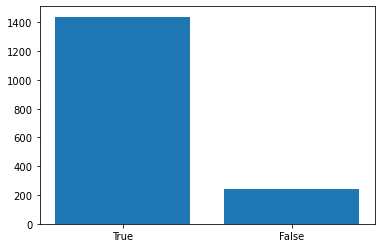

In [352]:
plt.bar(['True', 'False'], master_df['p3_dog'].value_counts())

In [6]:
p1_accuracy = (master_df['p1_dog'].value_counts()[1]/1679) * 100
p2_accuracy = (master_df['p2_dog'].value_counts()[1]/1679) * 100
p3_accuracy = (master_df['p3_dog'].value_counts()[1]/1679) * 100

<BarContainer object of 3 artists>

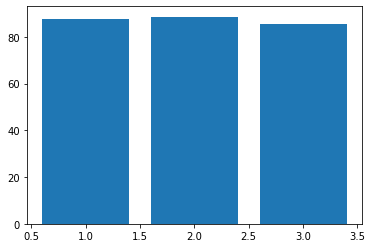

In [377]:
plt.bar([1, 2, 3], [p1_accuracy, p2_accuracy, p3_accuracy])

In [7]:
p1_accuracy, p2_accuracy, p3_accuracy

(87.55211435378202, 88.62418106015485, 85.70577724836212)

### Note 4:

* The 3 image predictions had almost the same accuracy of recognising if the photo is for a dog.